<a href="https://colab.research.google.com/github/Sinudeshmukh/Data-Science/blob/main/RandomForestAssgn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("Company_Data.csv")

In [ ]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


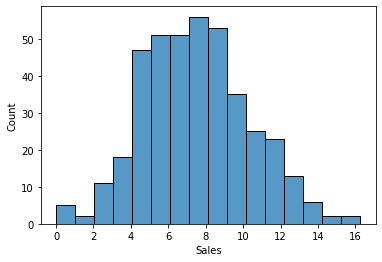

In [ ]:
sns.histplot(df['Sales'])
plt.show()

##Creating a New Column sale (High:if Sales>7 ),(Low : if sales<7 ) on given condition

In [ ]:
df['sale'] = ['Low' if x >= 7 else 'High' for x in df['Sales'] ]

In [ ]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,9.50,138,73,11,276,120,0,42,17,1,1,Low
1,11.22,111,48,16,260,83,1,65,10,1,1,Low
2,10.06,113,35,10,269,80,2,59,12,1,1,Low
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,High
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,Low
396,6.14,139,23,3,37,120,2,55,11,0,1,High
397,7.41,162,26,12,368,159,2,40,18,1,1,Low
398,5.94,100,79,7,284,95,0,50,12,1,1,High


##Label Encoding on Catogrical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['ShelveLoc'] = label_encoder.fit_transform(df.ShelveLoc)

In [ ]:
df['Urban'] = label_encoder.fit_transform(df.Urban)

In [ ]:
df['US'] = label_encoder.fit_transform(df.US)

In [ ]:
df['sale'] = label_encoder.fit_transform(df.sale)

In [ ]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [ ]:
df = df.drop(['Sales'],axis=1)

In [ ]:
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,1
396,139,23,3,37,120,2,55,11,0,1,0
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,0


##Assigning X and Y Variables

In [ ]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [ ]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [ ]:
Y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    0
397    1
398    0
399    1
Name: sale, Length: 400, dtype: int64

##Building Model for Random Forest Classifier

In [ ]:
model = RandomForestClassifier(n_estimators=100,max_features=4)

In [ ]:
result = cross_val_score(model,X,Y,cv=10)

In [ ]:
print(result.mean()*100)

82.25000000000001


##Grid Search to find Best Hyperparameters

In [ ]:
model1 = RandomForestClassifier()

n_estimators=[100,200,300,400]
max_features=[3,4,5,6]
param_grid = dict(n_estimators=n_estimators,max_features=max_features)

grid = GridSearchCV(model1,param_grid=param_grid,cv=10)
grid.fit(X,Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
print(grid.best_score_)

0.8275


In [ ]:
print(grid.best_params_)

{'max_features': 4, 'n_estimators': 300}


##Creating Model wit Best HyperParameters

In [ ]:
model2 = RandomForestClassifier(n_estimators=300,max_features=4)

In [ ]:
result = cross_val_score(model2,X,Y,cv=10)

In [ ]:
result

array([0.825, 0.85 , 0.775, 0.775, 0.875, 0.85 , 0.825, 0.925, 0.775,
       0.8  ])

In [ ]:
print(result.mean()*100)

82.75
